In [52]:
import numpy as np
import matplotlib.pyplot as plt

### Warmup
a)

C:\Users\rannu\AppData\Local\Temp\ipykernel_4276\878740272.py:7: RuntimeWarning: divide by zero encountered in divide
  return 1/np.sqrt(1+np.exp(-1)*(1/(x**2)-1))


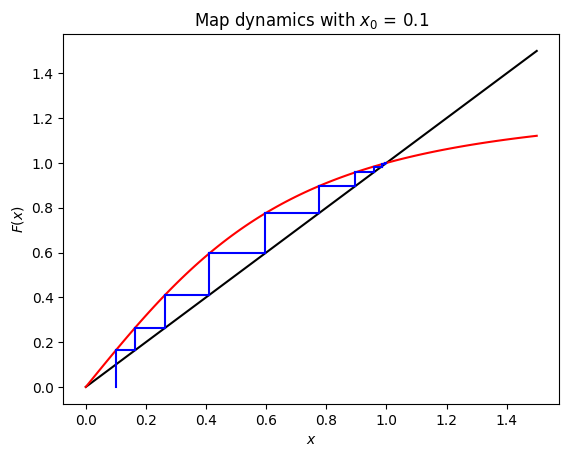

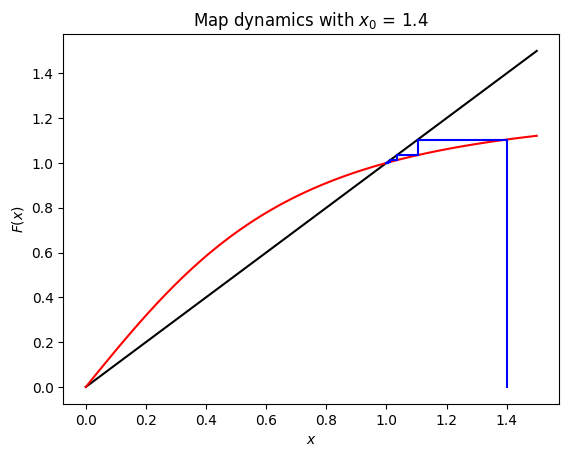

In [53]:

# Parameters
x_0 = 0.1
N = 30

# logistic map function
def F(x):
    return 1/np.sqrt(1+np.exp(-1)*(1/(x**2)-1))

# SSimulation of the cobweb diagram
def cobweb_constructor(x_0, N, function=F):
    x = np.zeros(N)
    x[0] = x_0
    for i in range(1,N):
        x[i] = function(x[i-1])
    return x

# Plotting the map, as well as the identity line and function F
def plot_map(x_sim, function=F, interval=[0,1.5], save_path='NONE'):
    x = np.linspace(interval[0], interval[1],100)
    plt.plot(x, x, 'k', markersize=1)
    plt.plot(x, function(x), 'r', markersize=1)
    plt.plot([x_sim[0],x_sim[0]], [0, x_sim[1]], 'b', markersize=1) # 1st lst is x-axis, 2nd is y-axis
    plt.plot([x_sim[0], x_sim[1]], [x_sim[1], x_sim[1]], 'b', markersize=1)
    for i in range(1, len(x_sim)-1):
        plt.plot([x_sim[i], x_sim[i]], [x_sim[i], x_sim[i+1]], 'b', markersize=1)
        plt.plot([x_sim[i], x_sim[i+1]], [x_sim[i+1], x_sim[i+1]], 'b', markersize=1)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$F(x)$')
    plt.title(r'Map dynamics with $x_0$ = ' + str(x_0))
    if save_path != 'NONE':
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

plot_map(cobweb_constructor(x_0, N), save_path='Map dynamics with x_0=0d1')
x_0 = 1.4
plot_map(cobweb_constructor(x_0, N), save_path='Map dynamics with x_0=1d4')

b)

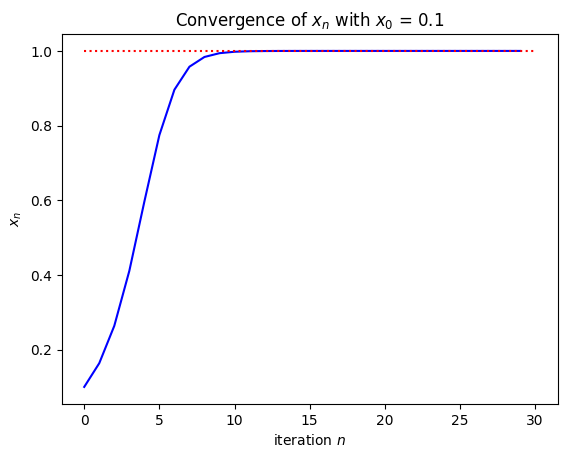

In [54]:
# Plot the first 30 values of the iterative map starting from r0 = 0.1. By this we mean that we plot 
# the value of r as a function of iterations done in the web

def cobweb_convergence_plot(x_0, N, function=F, fxdpt=1, save_path='NONE'):
    x = cobweb_constructor(x_0, N, function=function)
    plt.plot(x, 'b', markersize=1)
    plt.plot([0, N], [fxdpt, fxdpt], 'r:', markersize=1)
    plt.xlabel(r'iteration $n$')
    plt.ylabel(r'$x_n$')
    plt.title(r'Convergence of $x_n$ with $x_0$ = ' + str(x_0))
    if save_path != 'NONE':
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

cobweb_convergence_plot(0.1, N, save_path='Convergence of x_n of F with x_0=0d1')

### Challenge 
a)

kappa =  0.9152471844369772


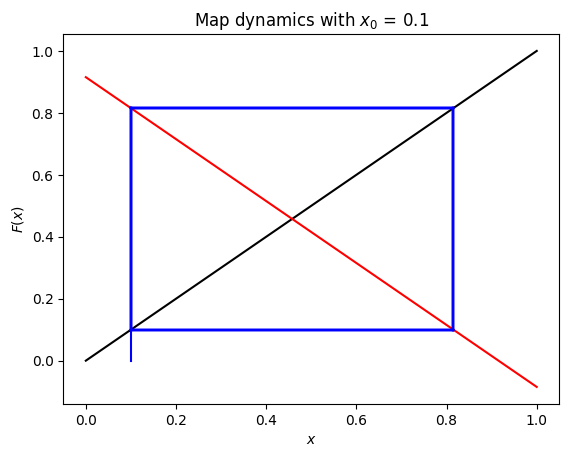

In [61]:
def kappa(A, omega):
    return np.exp((A/omega)*(1-np.exp(2*omega)))

def poincare_map(x):
    return kappa(A, omega)-x

def poincare_map_plot(A):
    x = np.linspace(0,1,100)
    plt.plot(x, x, 'k', markersize=1)
    plt.plot(x, poincare_map(A, x), 'r', markersize=1)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$F(x)$')
    plt.title(r'Poincare map with $A$ = ' + str(A))
    plt.show()

x_0 = 0.1
N = 30
A = 0.04
omega = 0.1
print("kappa = ", kappa(A, omega))
plot_map(cobweb_constructor(x_0, N, function=poincare_map), function=poincare_map, interval=[0,1])#, save_path='Poincare map with A=0d04')

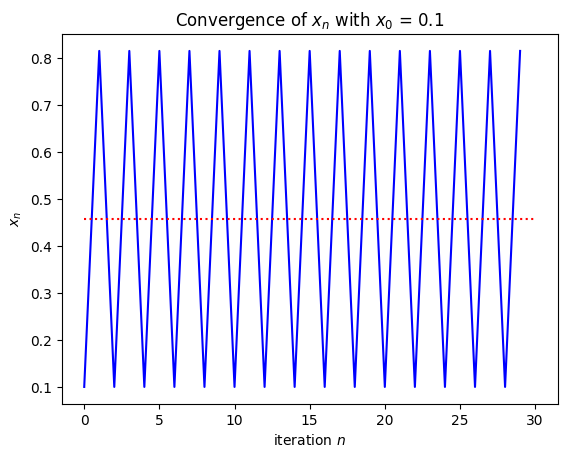

In [56]:
cobweb_convergence_plot(x_0, N, function=poincare_map, fxdpt=kappa(A, omega)/2, save_path='Convergence of x_n of Pmap with x_0=0d1')